# Common Plots
The following examples show how to create some common visualizations of AMISR data. Due to the 4D nature of the data, it is challenging to visualize all parts of the FoV simultaneously.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'data/20200207.001_lp_5min-fitcal.h5'

## RTI Plot
Range-Time-Intensity (RTI) plots are a common way to look at how profiles of a parameter change in time.

### The Most Basic

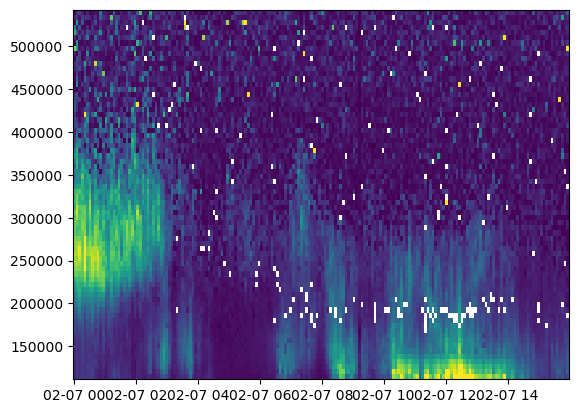

In [3]:
with h5py.File(filename, 'r') as h5:
    bidx = 0
    rng = h5['FittedParams/Range'][bidx,:]
    ne = h5['FittedParams/Ne'][:,bidx,:]
    utime = h5['Time/UnixTime'][:,0]

time = utime.astype('datetime64[s]')

plt.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)

### A Scientifically Useful Plot
Now lets create the same plot as before but with intelligible axes and labels, a colorbar, ect.  This is probably the minimum you want to do for inclusion in a paper or presentation.

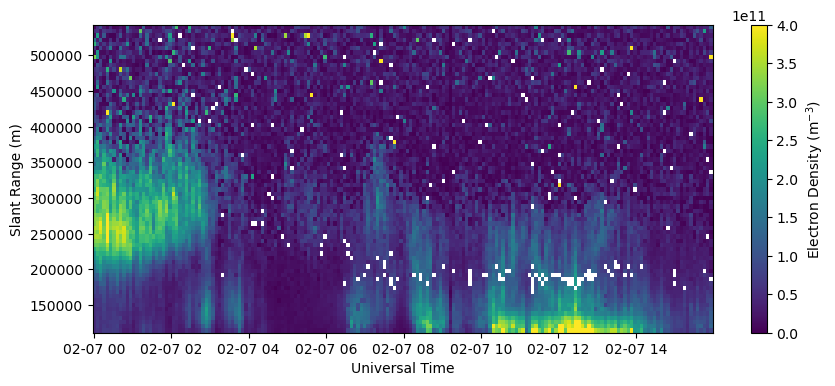

In [4]:
with h5py.File(filename, 'r') as h5:
    bidx = 0
    rng = h5['FittedParams/Range'][bidx,:]
    ne = h5['FittedParams/Ne'][:,bidx,:]
    utime = h5['Time/UnixTime'][:,0]

time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

### Plotting a Specific Beam
Plot a specific beam by selecting the beam index (`bidx`) more carefully.  You can either select a particular beam by its beamcode, or choose a beam based on proximity to a particular azimuth/elevation (i.e., choose the highest elevation beam in the beam pattern).

[[ 6.31970000e+04 -3.50900002e+01  6.61900024e+01  6.75000000e-20]
 [ 6.32390000e+04 -1.62299995e+01  5.86800003e+01  6.54000000e-20]
 [ 6.32810000e+04 -2.95000005e+00  4.75499992e+01  4.66000000e-20]
 [ 6.33650000e+04  7.60899963e+01  6.61900024e+01  6.21000000e-20]
 [ 6.34010000e+04  5.72299995e+01  5.86800003e+01  6.02000000e-20]
 [ 6.34490000e+04  4.39500008e+01  4.75499992e+01  4.21000000e-20]
 [ 6.40160000e+04  1.40400000e+01  9.00000000e+01  7.01000000e-20]
 [ 6.40370000e+04  2.05000000e+01  7.60000000e+01  6.37000000e-20]
 [ 6.40550000e+04  2.05000000e+01  6.40000000e+01  7.26000000e-20]
 [ 6.40790000e+04  2.05000000e+01  5.00000000e+01  5.53000000e-20]
 [ 6.41570000e+04 -1.54300003e+02  7.75000000e+01  4.45000000e-20]]


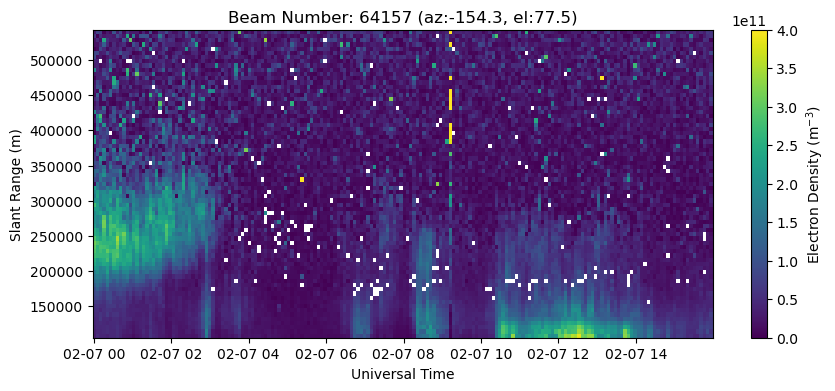

In [5]:
# Plot beam 64157
with h5py.File(filename, 'r') as h5:
    beamcodes = h5['BeamCodes'][:]
    print(beamcodes)
    bidx = np.where(beamcodes[:,0]==64157)[0][0]
    rng = h5['FittedParams/Range'][bidx,:]
    ne = h5['FittedParams/Ne'][:,bidx,:]
    utime = h5['Time/UnixTime'][:,0]

time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
ax.set_title('Beam Number: {:.0f} (az:{:.1f}, el:{:.1f})'.format(beamcodes[bidx,0], beamcodes[bidx,1], beamcodes[bidx,2]))
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

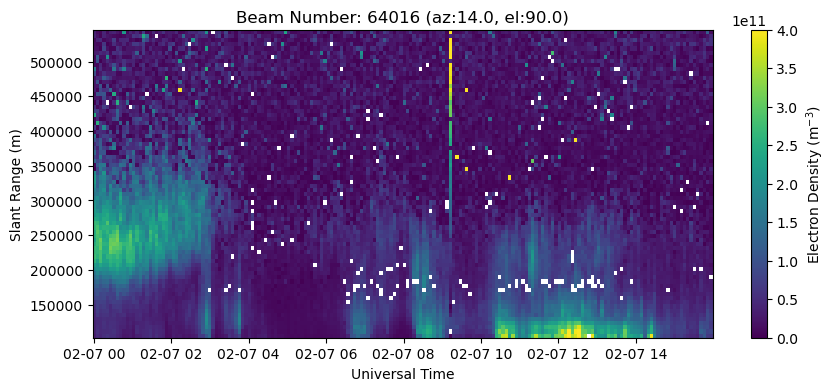

In [6]:
# Plot the highest elevation beam (vertical in this case)
with h5py.File(filename, 'r') as h5:
    beamcodes = h5['BeamCodes'][:]
    bidx = np.argmax(beamcodes[:,2])
    rng = h5['FittedParams/Range'][bidx,:]
    ne = h5['FittedParams/Ne'][:,bidx,:]
    utime = h5['Time/UnixTime'][:,0]

time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng, ne.T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
ax.set_title('Beam Number: {:.0f} (az:{:.1f}, el:{:.1f})'.format(beamcodes[bidx,0], beamcodes[bidx,1], beamcodes[bidx,2]))
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

## Beam Position Plot
Create a polar plot of all beam positions for this particular experiment.

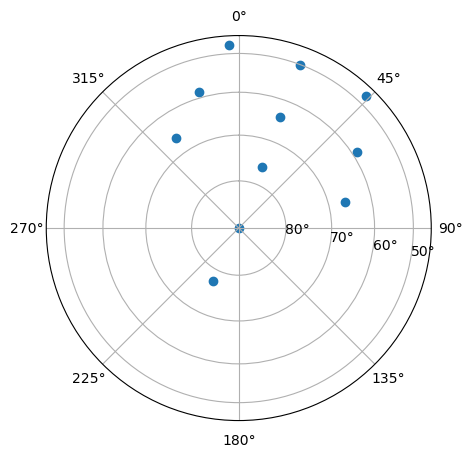

In [7]:
with h5py.File(filename, 'r') as h5:
    beamcodes = h5['BeamCodes'][:]

az = beamcodes[:,1]
el = beamcodes[:,2]

# set up plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2.0)
ax.set_rlabel_position(100.)
elticks = np.arange(20., 90., 10.)
ax.set_rticks(np.cos(elticks*np.pi/180.))
ax.set_yticklabels([str(int(el))+u'\N{DEGREE SIGN}' for el in elticks])

ax.scatter(az*np.pi/180., np.cos(el*np.pi/180.))


### Beam Positions with Data
Now plot the beams positions with density values for one timestamp.  Because this is a 2D plot and each beam has many values at different ranges, you need to choose a characteristic value from each profile to plot.  A simple way to do this is plot the range index that intersects your altitude of interest (say 300 km).  Because range binning is done approximately in altitude, you can use the same index across most of the FoV, although this is not the most precise.  Plot the density values of this slice at 2020-02-07 02:00:00 UT.

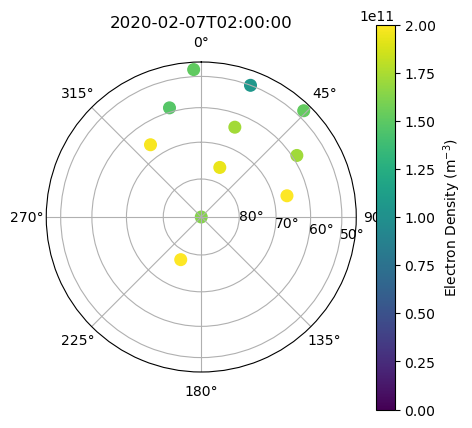

In [8]:
targalt = 300.*1000.
targtime = np.datetime64('2020-02-07T02:00:00')

with h5py.File(filename, 'r') as h5:
    beamcodes = h5['BeamCodes'][:]
    # get vertical beam index
    bidx = np.argmax(beamcodes[:,2])
    alt = h5['FittedParams/Altitude'][bidx,:]
    # find range index that corresponds to the target altitude
    aidx = np.argmin(np.abs(alt-targalt))
    utime = h5['Time/UnixTime'][:,0]
    # find time index that corresponds to target time
    tidx = np.argmin(np.abs(utime.astype('datetime64[s]')-targtime))
    ne = h5['FittedParams/Ne'][tidx,:,aidx]

az = beamcodes[:,1]
el = beamcodes[:,2]

# set up plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2.0)
ax.set_rlabel_position(100.)
elticks = np.arange(20., 90., 10.)
ax.set_rticks(np.cos(elticks*np.pi/180.))
ax.set_yticklabels([str(int(el))+u'\N{DEGREE SIGN}' for el in elticks])

c = ax.scatter(az*np.pi/180., np.cos(el*np.pi/180.), c=ne, s=70, vmin=0., vmax=2.e11)
ax.set_title(targtime)
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')